# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arenapolis
Processing Record 2 of Set 1 | inekar
City not found. Skipping...
Processing Record 3 of Set 1 | verkhnevilyuysk
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | erenhot
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | tsetserleg
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | choibalsan
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arenapolis,-14.4503,-56.8461,75.70,29,0,5.64,BR,1722901313
1,verkhnevilyuysk,63.4453,120.3167,64.54,66,94,6.67,RU,1722901315
2,ribeira grande,38.5167,-28.7000,76.77,92,40,8.01,PT,1722901316
3,puerto ayora,-0.7393,-90.3518,68.40,83,56,10.00,EC,1722901191
4,port-aux-francais,-49.3500,70.2167,35.04,86,85,24.58,TF,1722901318


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arenapolis,-14.4503,-56.8461,75.70,29,0,5.64,BR,1722901313
1,verkhnevilyuysk,63.4453,120.3167,64.54,66,94,6.67,RU,1722901315
2,ribeira grande,38.5167,-28.7000,76.77,92,40,8.01,PT,1722901316
3,puerto ayora,-0.7393,-90.3518,68.40,83,56,10.00,EC,1722901191
4,port-aux-francais,-49.3500,70.2167,35.04,86,85,24.58,TF,1722901318


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

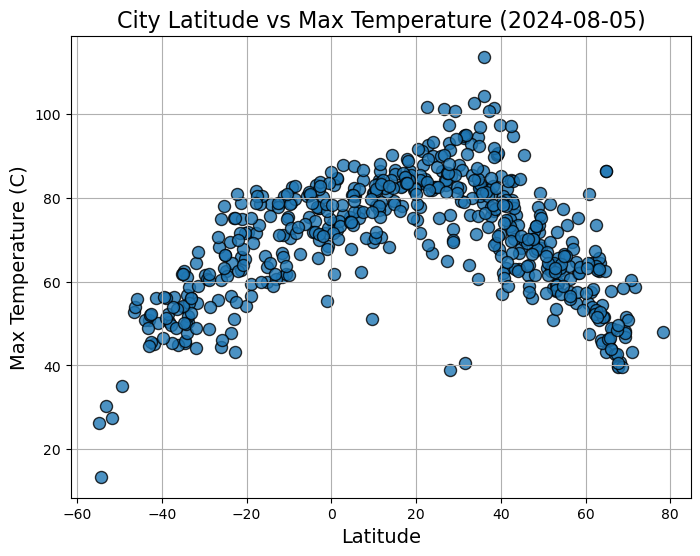

In [33]:
# Build scatter plot for latitude vs. temperature
now_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(latitude, max_temp, s=75, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig('../Starter_Code/output_data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

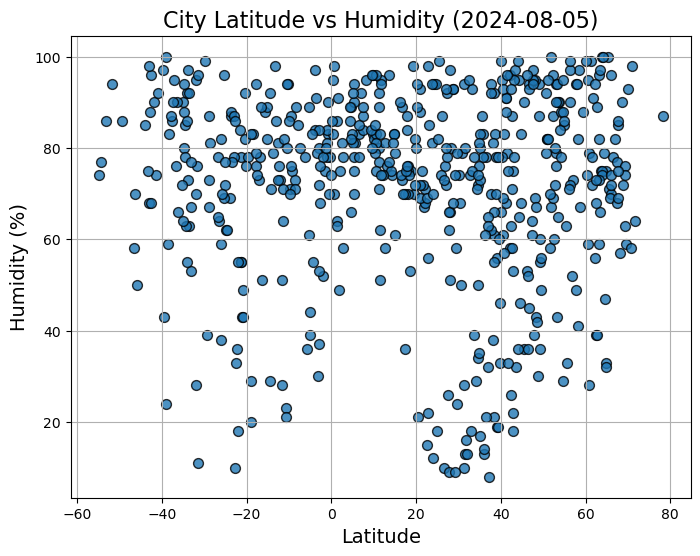

In [26]:
# Build the scatter plots for latitude vs. humidity
now_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
humid = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(latitude, humid, s =50, edgecolors='black', linewidths=1, marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({now_date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig('../Starter_Code/output_data/Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

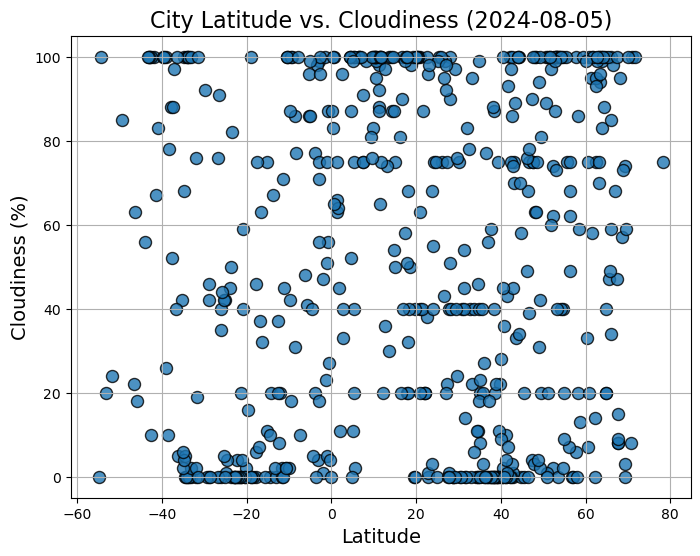

In [30]:
# Build the scatter plots for latitude vs. cloudiness
now_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(latitude, clouds, s=75, edgecolors='black', linewidths=1, marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({now_date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig('../Starter_Code/output_data/Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

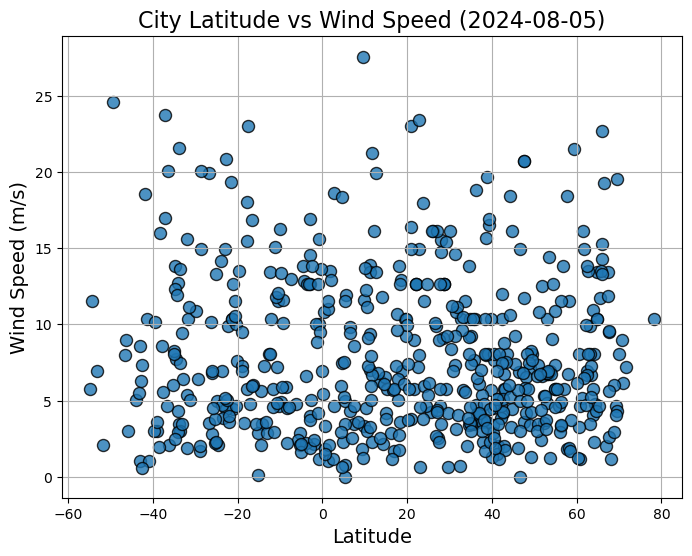

In [32]:
# Build the scatter plots for latitude vs. wind speed
now_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
fig1, ax1, = plt.subplots(figsize=(8, 6))
plt.scatter(latitude, wind, s=75, edgecolors='black', linewidths=1, marker='o', alpha=0.8)


# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed ({now_date})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    r_values = x_axis * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-squared is: {rvalue**2}")
    
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    plt.scatter(x_axis, y_axis, s=100, marker="o", alpha=0.8)
    plt.plot(x_axis,r_values,"r-")  
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ({now_date})",fontsize = 16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernhemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northernhemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,verkhnevilyuysk,63.4453,120.3167,64.54,66,94,6.67,RU,1722901315
2,ribeira grande,38.5167,-28.7000,76.77,92,40,8.01,PT,1722901316
6,guerrero negro,27.9769,-114.0611,75.96,66,90,15.55,MX,1722901321
7,isafjordur,66.0755,-23.1240,43.97,96,100,22.68,IS,1722901180
9,erenhot,43.6475,111.9767,75.85,32,33,8.05,CN,1722901324


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernhemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southernhemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arenapolis,-14.4503,-56.8461,75.70,29,0,5.64,BR,1722901313
3,puerto ayora,-0.7393,-90.3518,68.40,83,56,10.00,EC,1722901191
4,port-aux-francais,-49.3500,70.2167,35.04,86,85,24.58,TF,1722901318
5,avarua,-21.2078,-159.7750,78.85,78,20,12.66,CK,1722901319
8,edinburgh of the seven seas,-37.0676,-12.3116,56.41,95,97,23.73,SH,1722901323


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.38186302128538674


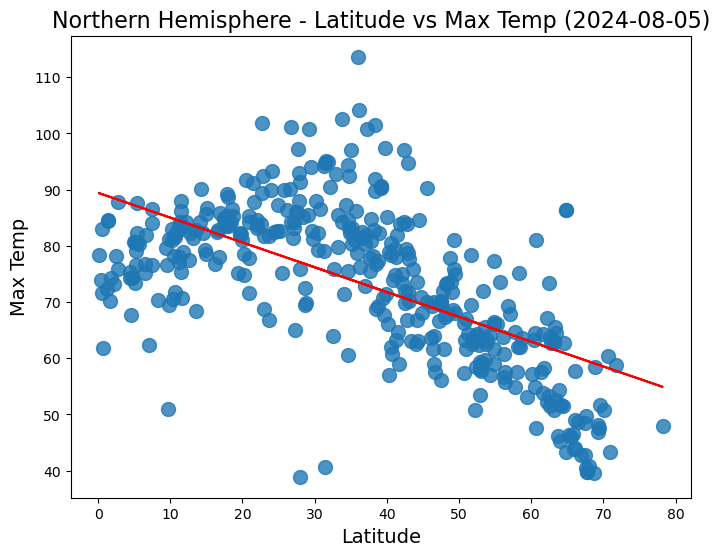

In [108]:
# Linear regression on Northern Hemisphere
x_axis = northernhemi_df['Lat']
y_axis = northernhemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern', (10, 25))

plt.savefig('../Starter_Code/output_data/northern_regression_fig1.png')

plt.show()

The r-squared is: 0.6437166936499188


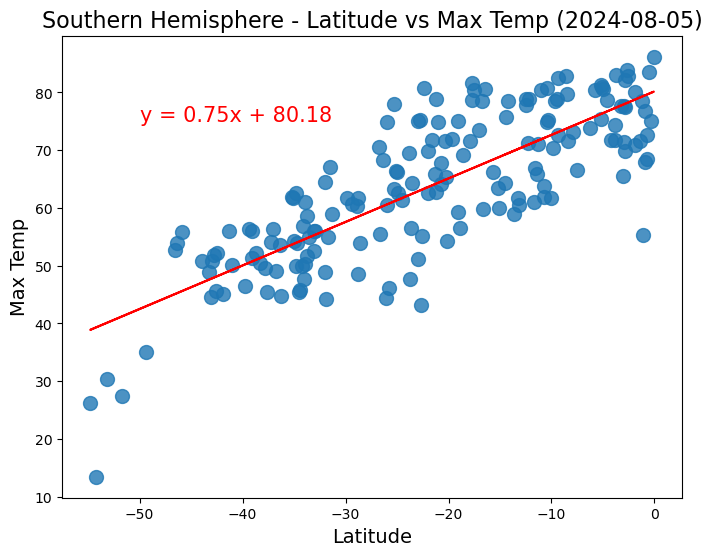

In [75]:
# Linear regression on Southern Hemisphere
x_axis = southernhemi_df['Lat']
y_axis = southernhemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern', (-50, 75))

plt.savefig('../Starter_Code/output_data/southern_regression_fig1.png')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00318801076310964


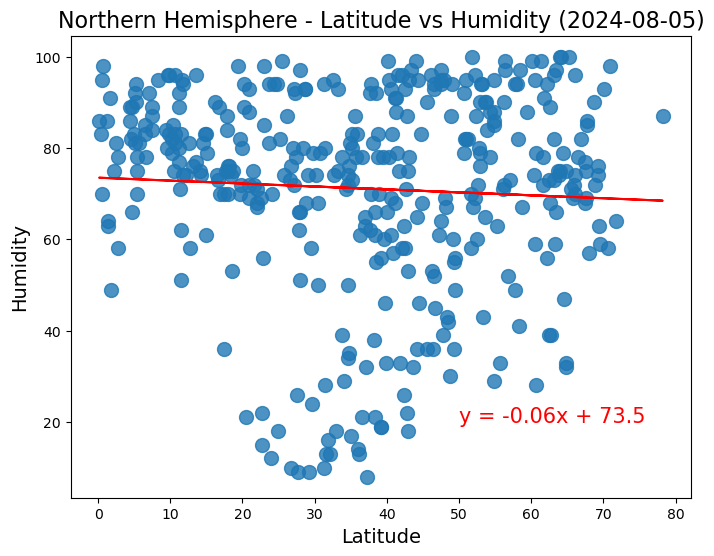

In [83]:
# Northern Hemisphere
x_axis = northernhemi_df['Lat']
y_axis = northernhemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern', (50, 20))

plt.savefig('../Starter_Code/output_data/northern_regression_fig2.png')

plt.show()

The r-squared is: 0.010161087010042045


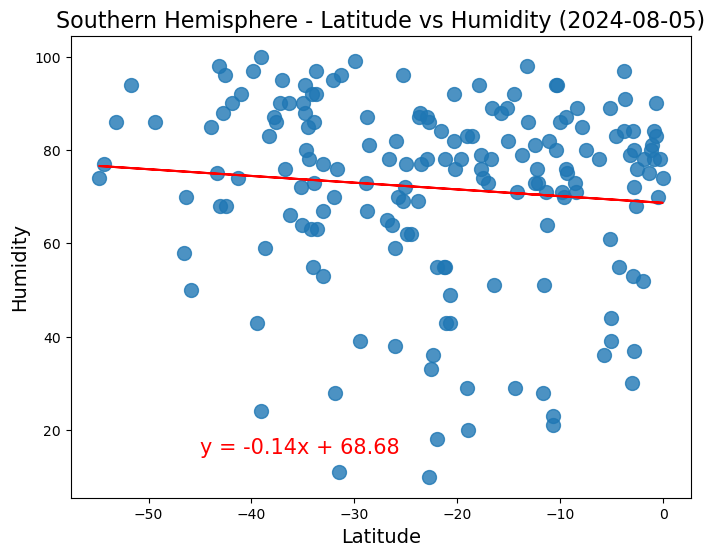

In [84]:
# Southern Hemisphere
x_axis = southernhemi_df['Lat']
y_axis = southernhemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern', (-45, 15))

plt.savefig('../Starter_Code/output_data/southern_regression_fig2.png')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007327335821877195


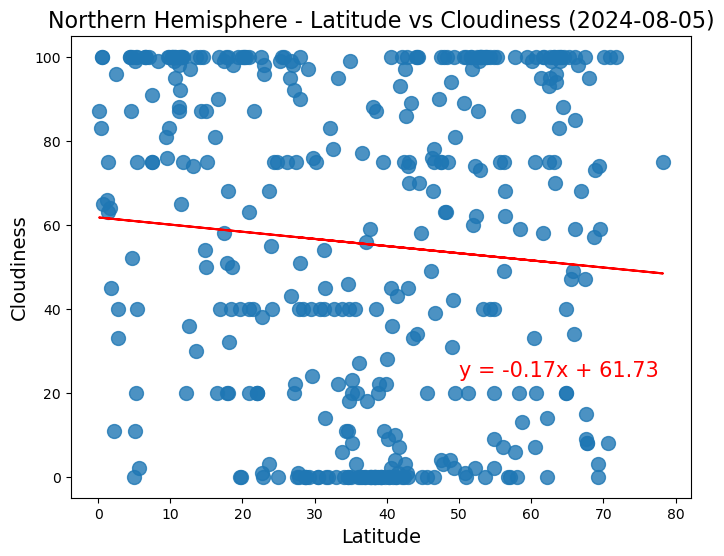

In [85]:
# Northern Hemisphere
x_axis = northernhemi_df['Lat']
y_axis = northernhemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern', (50, 24))

plt.savefig('../Starter_Code/output_data/northern_regression_fig3.png')

plt.show()

The r-squared is: 0.0031491391713929736


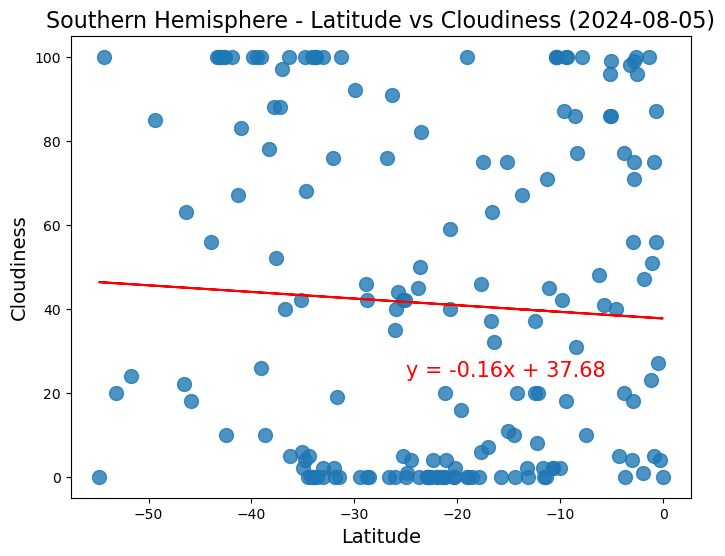

In [96]:
# Southern Hemisphere
x_axis = southernhemi_df['Lat']
y_axis = southernhemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern', (-25, 24))

plt.savefig('../Starter_Code/output_data/southern_regression_fig3.png')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 1.8932253968696165e-05


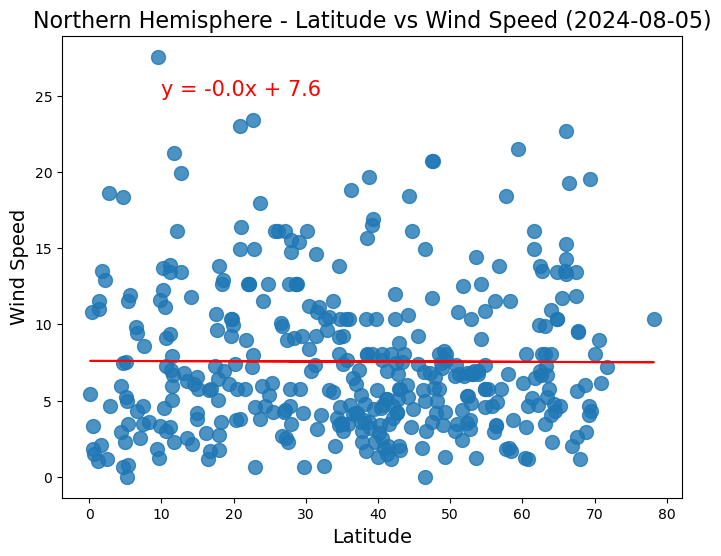

In [103]:
# Northern Hemisphere
x_axis = northernhemi_df['Lat']
y_axis = northernhemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern', (10, 25))

plt.savefig('../Starter_Code/output_data/northern_regression_fig4.png')

plt.show()

The r-squared is: 0.0005161871271130924


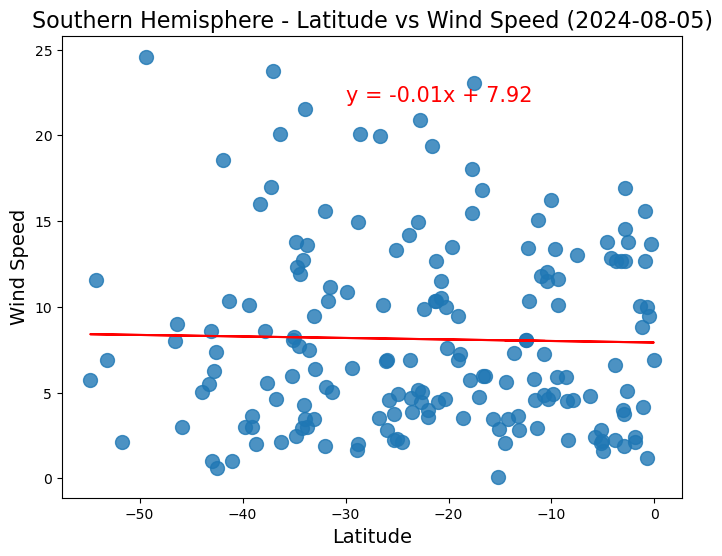

In [111]:
# Southern Hemisphere
x_axis = southernhemi_df['Lat']
y_axis = southernhemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern', (-30, 22))

plt.savefig('../Starter_Code/output_data/southern_regression_fig4.png')

plt.show()

**Discussion about the linear relationship:** 